*Wykonała Amelia Bieda 275973*
### Warunkowa wartość oczekiwana
Wartość oczekiwana zmiennej $Y$ warunkowanej zmienną $X$ spełnia własność $\Bbb{E} (Y |X = x) = \arg \min_g \Bbb{E}\Big(\big(Y − g(X)\big)^2\Big)$. Oznacza to, że $\Bbb{E}(Y |X)$ to najlepsze przybliżenie w sensie $L^2$ zmiennej $Y$ korzystające z danych pochodzących ze zmiennej $X$.
Z tej własności wynikają następujące stwierdzenia:
1. Jeśli $X, Y$ są zmiennymi niezależnymi a $\Bbb{E}(Y) = 0$, to dla $Z = X\cdot Y + \sin X$ zachodzi $\Bbb{E}(Z|X) = \sin X$. 

2. Gdy $N$ jest procesem Poissona o intensywnosci $\lambda$, to dla $T \ge t \ge 0$ zachodzi $\Bbb{E}(N_t|N_T) = \frac{t\cdot N_T}T$. 
    Oznacza to, że np. zakładając przybywanie klientów do sklepu zgodnie z procesem Poissona i mając dane na temat dotychczasowej ilości klientów w sklepie w chwili $T$ (czyli $N_T$), to najlepszym przybliżeniem dotychczasowej chwili klientów w chwili $t < T$ równej $N_t$ jest $\frac{t\cdot N_T}T$.
    
3. Gdy $N $ jest procesem Poissona o intensywnosci $\lambda$, to dla $t \ge s \ge 0$ zachodzi $\Bbb{E}(N_t|{\cal{F}}_s) = N_s +\lambda(t − s)$, gdzie ${\cal{F}}_s$ to filtracja naturalna procesu $N_s$.
    Oznacza to, że np. zakładając przybywanie klientów do sklepu zgodnie z procesem Poissona i mając dane na temat dotychczasowej ilości klientów w sklepie w każdej chwili $\omega$ spełniającej $0 \le \omega \le s$ (czyli ${\cal{F}}_s$), to najlepszym przybliżeniem dotychczasowej chwili klientów w chwili $t\ge s$ jest $N_s+\lambda(t-s)$.

Sprawdzimy symulacyjnie poprawność powyższych stwierdzeń.

Użyte biblioteki:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
import typing

### Pierwsze stwierdzenie 
Weźmiemy $X, Y$ iid ∼$ N (0, 1)$. Aby sprawdzić poprawność pierwszego stwierdzenia, wykonamy scatterplot $X$ → $Z|X$ wysymulowanych 1000 wartości i zaznaczymy na nim 100 wartości estymowanych oraz wykres wartości teoretycznych $\Bbb{E}(Z|X)$.

In [2]:
X = np.random.normal(0, 1, 1000)
Y = np.random.normal(0, 1, 1000)
Z_X = X * Y + np.sin(X)

# Estymacja wartości E(Z|X)
estimate = [np.mean(x * Y + np.sin(x)) for x in X] 

# Teoretyczna wartość E(Z|X) = sin(X)
bins = np.linspace(min(X), max(X), 50)
theoretical = np.sin(bins)

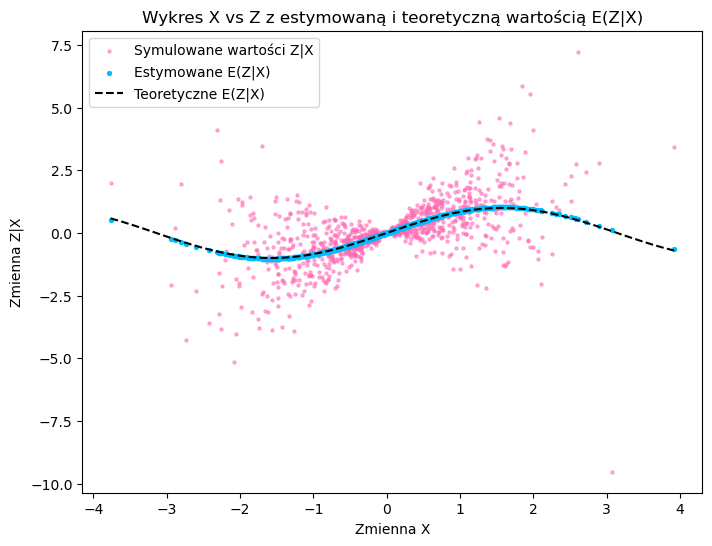

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Z_X, alpha=0.5, s=5, color='hotpink', label='Symulowane wartości Z|X')
plt.scatter(X, estimate, s=8, color='deepskyblue', label='Estymowane E(Z|X)')
plt.plot(bins, theoretical, color='black', linestyle='--', label='Teoretyczne E(Z|X)')
plt.xlabel('Zmienna X')
plt.ylabel('Zmienna Z|X')
plt.legend()
plt.title('Wykres X vs Z z estymowaną i teoretyczną wartością E(Z|X)')
plt.show()

### Drugie stwierdzenie
Aby sprawdzić czy zachodzi równość $\Bbb{E}(N_t|N_T) = \frac{t\cdot N_T}T$ dla procesu Poissona. Porównamy wykresy zależności $\Bbb{E}(N_t|N_T)$ od czasu $t$ dla kilku możliwych realizacji $N_T$ z wykresami wartości teoretycznych $\frac{t\cdot N_T}T$ dla $0\le t\le T$. Weźmiemy $T=1$,$N_T=\{10,20,30\}$.

In [4]:
def poisson_process(T:int=1, NT:int=10) -> np.array:
    """
    Generuje proces Poissona z określoną liczbą punktów czasowych.

    Args:
    T (int): Czas końcowy, do którego ma być generowany proces Poissona (default 1).
    NT (int): Liczba punktów czasowych do wygenerowania (default 10).

    Returns:
    (np.array): Posortowana tablica zawierająca NT punktów czasowych, które są wynikiem
        generowania procesu Poissona w przedziale czasowym [0, T).
        
    Raises:
        ValueError: T lub NT są mniejsze lub równe 0.

    Example:
    >>> poisson_process(T=1,NT=4)
        array([0.08063313, 0.47454396, 0.63582349, 0.97116085])
    """
    if T <= 0 or NT <= 0:
        raise ValueError("Unsupported argument value.")
    T = np.random.uniform(0, T, NT)
    T.sort()
    return T

In [5]:
def expected_Nt(T: int = 1, NT: int=10, size: int = 1000) -> tuple:
    """
    Oblicza wartość oczekiwaną oraz teoretyczną N(t) pod warunkiem N(T) dla procesu Poissona.

    Args:
    T (int): Czas końcowy, do którego ma być generowany proces Poissona (default 1).
    NT (int): Liczba punktów czasowych do wygenerowania (default 10).
    size (int): Liczba procesów Poissona do wygenerowania i uśrednienia wyników (default 1000).

    Returns:
    (tuple):
        - numpy.ndarray: Szacowana wartość E[N(t)|N(T)] w równomiernie rozłożonych momentach czasu.
        - numpy.ndarray: Teoretyczna wartość E[N(t)|N(T)] w równomiernie rozłożonych momentach czasu.
    Raises:
        ValueError: jeśli jakikolwiek argument na wejściu jest mniejszy od zera.
    
    Example:
    >>> expected_Nt(T=1,NT=2,size=10)
        (array([0. , 0.2, 0.6, 0.9, 1. , 1.1, 1.2, 1.5, 1.7, 2. ]),
         array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
        1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ]))"""
    if T < 0 or NT < 0 or size < 0:
        raise ValueError("Unsupported argument value.")
    t = np.linspace(0, T, size)
    Sn = [poisson_process(T, NT) for _ in range(size)]
    NT_vals = [len(s) for s in Sn]
    estimate = np.zeros(len(t))
    theoretical = np.zeros(len(t))

    for i in range(1, len(t)):
        estimate[i] = np.mean([np.sum(s < t[i]) for s in Sn])
        theoretical[i] = np.mean([t[i] * NT / T for NT in NT_vals])
    
    return estimate, theoretical

In [6]:
est1, the1 = expected_Nt(T=1,NT=10,size=1000)
est2, the2 = expected_Nt(T=1,NT=20,size=1000)
est3, the3 = expected_Nt(T=1,NT=30,size=1000)
t = np.linspace(0, 1, 1000)

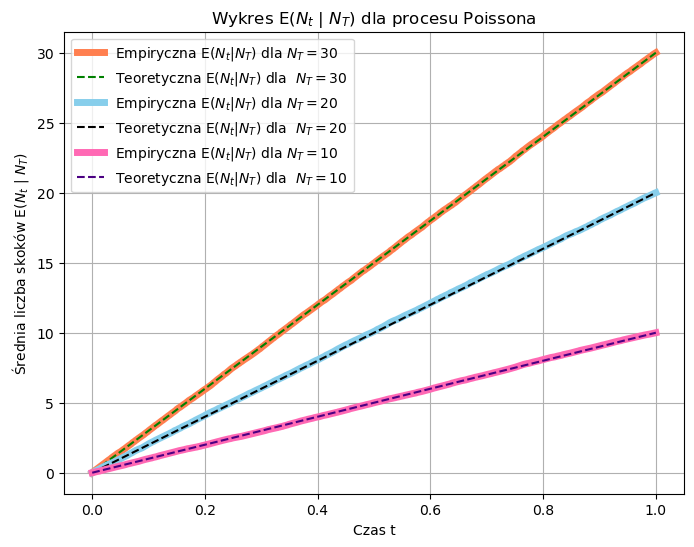

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(t, est3, label='Empiryczna E($N_t | N_T$) dla $N_T=30$', color='coral', lw=5)
plt.plot(t, the3, label='Teoretyczna E($N_t | N_T$) dla  $N_T=30$', color='green', linestyle='dashed')
plt.plot(t, est2, label='Empiryczna E($N_t | N_T$) dla $N_T=20$', color='skyblue', lw=5)
plt.plot(t, the2, label='Teoretyczna E($N_t | N_T$) dla  $N_T=20$', color='black', linestyle='dashed')
plt.plot(t, est1, label='Empiryczna E($N_t | N_T$) dla $N_T=10$', color='hotpink', lw=5)
plt.plot(t, the1, label='Teoretyczna E($N_t | N_T$) dla  $N_T=10$', color='indigo', linestyle='dashed')
plt.xlabel('Czas t')
plt.ylabel('Średnia liczba skoków E($N_t$ | $N_T$)')
plt.legend()
plt.title('Wykres E($N_t$ | $N_T$) dla procesu Poissona')
plt.grid()
plt.show()

### Trzecie stwierdzenie
Sprawdzimy czy zachodzi równość $\Bbb{E}(N_t|{\cal{F}}_s) = N_s +\lambda(t − s)$ dla procesu Poissona.
W poniższym zadaniu bazujemy na podobnych założeniach jak w części drugiej, jednak tym razem procesy Poissona generowane są jedynie do momentu s.
Porównamy wykresy zależności $\Bbb{E}(N_t|{\cal{F}}_s)$ od czasu $t$ razem z wykresami $ N_s +\lambda(t − s)$ od $t$ dla dla kilku realizacji $N_s$, $0\le t\le T$.

s = 1, λ = 10.  Podpowiedź: Wygeneruj kilka trajektorii Nω, ω ≤ s i wybierz z
nich te, które przybierają różne wartości Ns (w tym kroku nie potrzebowałeś użycia parametru intensywności).
Następnie skorzystaj z własności Markowa i dla każdej z wybranych realizacji Nω, ω ≤ s dosymuluj trajektorie
Nω dla s < ω ≤ t, za pomocą których wyestymuj E (Nt|Fs).


In [8]:
def expected_Nt_s(s:int=0, T: int = 1, NT: int=10, size: int = 1000) -> tuple:
    """
    Oblicza wartość oczekiwaną oraz teoretyczną N(t) pod warunkiem F(s) dla procesu Poissona.

    Args:
    s (int):
    T (int): Czas końcowy, do którego ma być generowany proces Poissona (default 1).
    NT (int): Liczba punktów czasowych do wygenerowania (default 10).
    size (int): Liczba procesów Poissona do wygenerowania i uśrednienia wyników (default 1000).

    Returns:
    (tuple):
        - numpy.ndarray: Szacowana wartość E[N(t)|F(s)] w równomiernie rozłożonych momentach czasu.
        - numpy.ndarray: Teoretyczna wartość E[N(t)|F(s)] w równomiernie rozłożonych momentach czasu.
    
    Raises:
        ValueError: jeśli jakikolwiek argument na wejściu jest mniejszy od zera lub gdy s jest większe lub równe T.
    
    Example:
    >>> expected_Nt_s(s=1, T= 5, NT=10, size = 10)
        (array([ 2.1,  3. ,  4.1,  5.7,  6. ,  6.8,  7.2,  8.3,  9.1, 10. ]),
         array([ 2.1       ,  2.98888889,  3.87777778,  4.76666667,  5.65555556,
         6.54444444,  7.43333333,  8.32222222,  9.21111111, 10.1       ]))"""
    if s >= T or s < 0 or T < 0 or NT < 0 or size < 0:
        raise ValueError("Unsupported argument value.")
    t = np.linspace(s, T, size)
    Sn = [poisson_process(T, NT) for _ in range(size)]
    estimate = np.zeros(len(t))
    theoretical = np.zeros(len(t))

    for i in range(len(t)):
        estimate[i] = np.mean([np.sum(p < t[i]) for p in Sn])
        Ns_values = [np.sum(p < s) for p in Sn]
        theoretical[i] = np.mean(Ns_values) + (NT/T) * (t[i] - s)
    
    return estimate, theoretical

In [9]:
est4, the4 = expected_Nt_s(s=3,T=10,NT=10)
est5, the5 = expected_Nt_s(s=3,T=10,NT=20)
est6, the6 = expected_Nt_s(s=3,T=10,NT=30)
ts = np.linspace(2,10,1000)

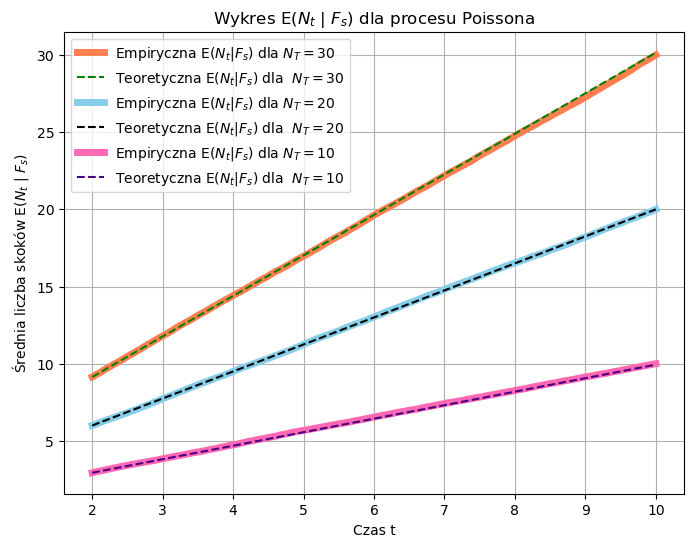

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(ts, est6, label='Empiryczna E($N_t | F_s$) dla $N_T=30$', color='coral', lw=5)
plt.plot(ts, the6, label='Teoretyczna E($N_t | F_s$) dla  $N_T=30$', color='green', linestyle='dashed')
plt.plot(ts, est5, label='Empiryczna E($N_t | F_s$) dla $N_T=20$', color='skyblue', lw=5)
plt.plot(ts, the5, label='Teoretyczna E($N_t | F_s$) dla  $N_T=20$', color='black', linestyle='dashed')
plt.plot(ts, est4, label='Empiryczna E($N_t | F_s$) dla $N_T=10$', color='hotpink', lw=5)
plt.plot(ts, the4, label='Teoretyczna E($N_t | F_s$) dla  $N_T=10$', color='indigo', linestyle='dashed')
plt.xlabel('Czas t')
plt.ylabel('Średnia liczba skoków E($N_t$ | $F_s$)')
plt.legend()
plt.title('Wykres E($N_t$ | $F_s$) dla procesu Poissona')
plt.grid()
plt.show()